#1 - Explain why decision trees are non-parametric models. <br>
Decision Trees are non-parametric because we do not know the number of parameters of the model before seeing training data.


In [84]:
#2 - Load data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split
import graphviz

df = pd.read_csv('https://raw.githubusercontent.com/grbruns/cst383/master/College.csv', index_col=0)

In [85]:
#3 - 3.	Convert the 'Private' column to an numeric column with values 0 and 1
df['Private'] = (df['Private'] == 'Yes').astype(int)

In [86]:
#4 - Do a little exploration of the data to remember what it’s like
df.info

<bound method DataFrame.info of                                 Private   Apps  Accept  Enroll  Top10perc  \
Abilene Christian University          1   1660    1232     721         23   
Adelphi University                    1   2186    1924     512         16   
Adrian College                        1   1428    1097     336         22   
Agnes Scott College                   1    417     349     137         60   
Alaska Pacific University             1    193     146      55         16   
...                                 ...    ...     ...     ...        ...   
Worcester State College               0   2197    1515     543          4   
Xavier University                     1   1959    1805     695         24   
Xavier University of Louisiana        1   2097    1915     695         34   
Yale University                       1  10705    2453    1317         95   
York College of Pennsylvania          1   2989    1855     691         28   

                                Top25perc  

In [87]:
#5 - We will try to predict whether a college is public or private.  Select a few predictors, create NumPy arrays X and y, and then do a training/test split.  
predictors = ['Outstate', 'F.Undergrad']
X = df[predictors].values
y = df['Private'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

In [88]:
#6 - Train a tree classifier using Scikit-Learn's DecisionTreeClassifier.  
clf = DecisionTreeClassifier(max_depth=2, random_state=0)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=0)

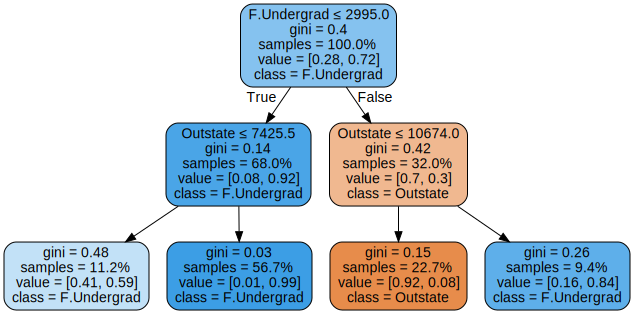

In [89]:
#7 - plot your tree using graphviz.
dot_data = export_graphviz(clf, precision=2,
                 	feature_names=predictors,  
                 	proportion=True,
                 	class_names=predictors,  
                 	filled=True, rounded=True,  
                 	special_characters=True)


graph = graphviz.Source(dot_data)  
graph
 

Accuracy: 0.9316239316239316


[Text(0, 0.5, 'Public'), Text(0, 1.5, 'Private')]

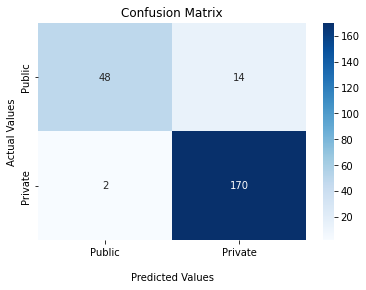

In [90]:
#8 - Use your classification tree to predict whether examples in your test data are public or private.  Compute the confusion matrix and the accuracy of your predictions.
y_predict = clf.predict(X_test)
print("Accuracy: " + str((y_predict == y_test).mean()))

from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test, y_predict)
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues', fmt='.3g')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values')
ax.set_title('Confusion Matrix')

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Public','Private'])
ax.yaxis.set_ticklabels(['Public','Private'])